## face recognation library 

### face detection 

Number of faces detected: 1


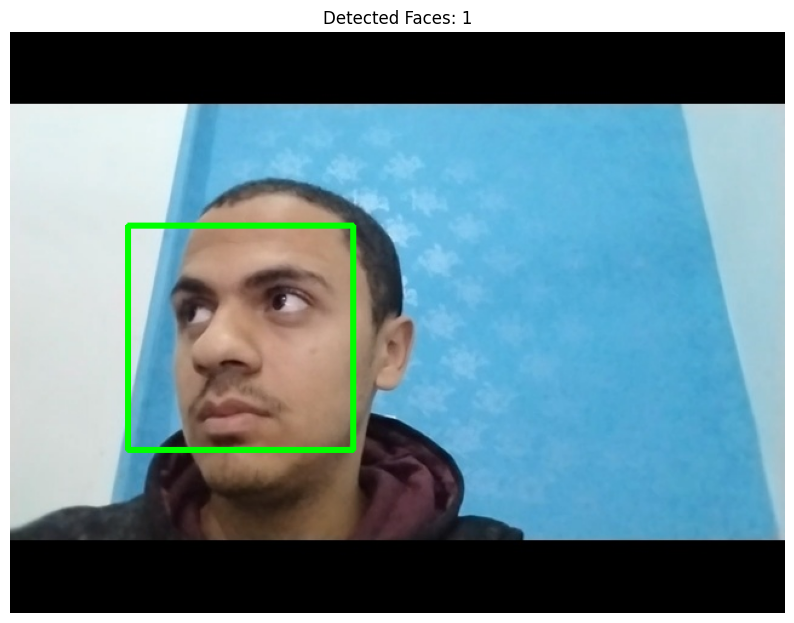

True

In [8]:
import face_recognition
import matplotlib.pyplot as plt
import numpy as np
import cv2
abdo="images/drowsy.75819880-b523-11ef-89e7-b4b676dfb901.jpg"
# Load the image
image = face_recognition.load_image_file(abdo)

# Detect face locations
face_locations = face_recognition.face_locations(image)
print(f"Number of faces detected: {len(face_locations)}")

# Convert the image from RGB (face_recognition default) to BGR (OpenCV format)
image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Draw rectangles around the faces
for (top, right, bottom, left) in face_locations:
    cv2.rectangle(image_bgr, (left, top), (right, bottom), (0, 255, 0), 3)

# Display the image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f'Detected Faces: {len(face_locations)}')
plt.show()

# Optional: Save the image with detected faces
cv2.imwrite('faces_detected.jpg', image_bgr)

### face landmarks 

Number of faces detected: 1


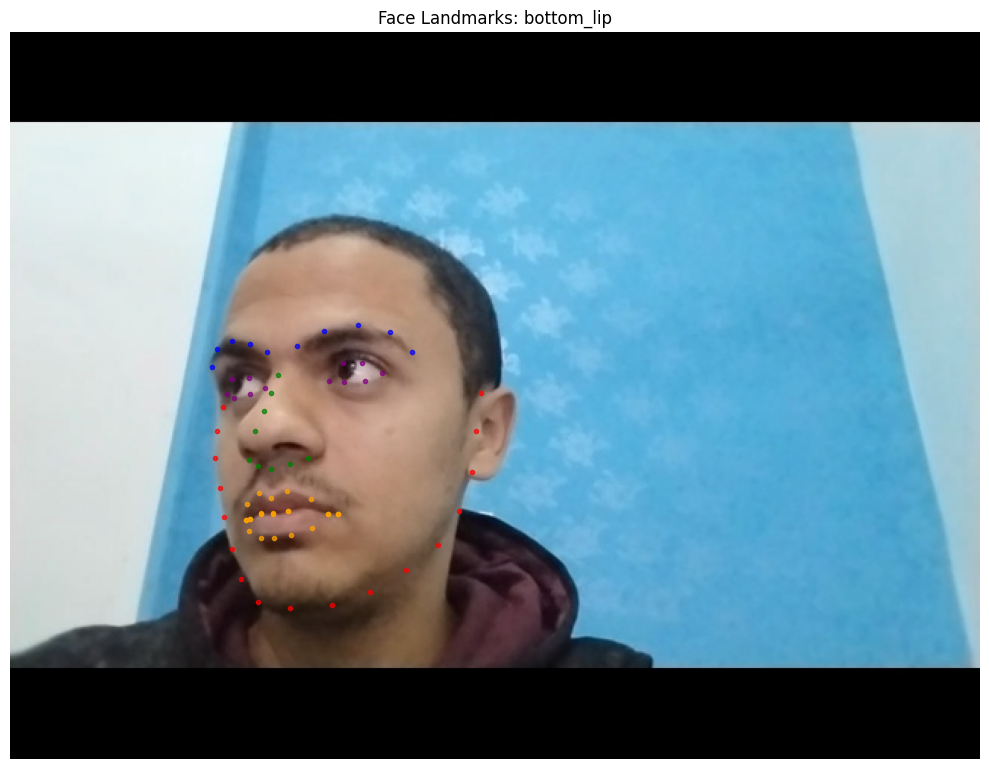


Landmark Types Detected:
chin
left_eyebrow
right_eyebrow
nose_bridge
nose_tip
left_eye
right_eye
top_lip
bottom_lip


In [9]:
import face_recognition
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Load the image
abdo = "images/drowsy.75819880-b523-11ef-89e7-b4b676dfb901.jpg"
image = face_recognition.load_image_file(img)

# Detect face landmarks
face_landmarks_list = face_recognition.face_landmarks(image)
print(f"Number of faces detected: {len(face_landmarks_list)}")

# Convert the image from RGB (face_recognition default) to BGR (OpenCV format)
image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

# Visualization setup
plt.figure(figsize=(10, 10))

# For each face detected
for face_landmarks in face_landmarks_list:
    # Convert the image to RGB for matplotlib
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    
    # Plot the original image
    plt.imshow(image_rgb)
    
    # Landmark colors
    colors = {
        'chin': 'red',
        'left_eyebrow': 'blue',
        'right_eyebrow': 'blue',
        'nose_bridge': 'green',
        'nose_tip': 'green',
        'left_eye': 'purple',
        'right_eye': 'purple',
        'top_lip': 'orange',
        'bottom_lip': 'orange'
    }

    # Plot each landmark type
    for landmark_type, landmark_points in face_landmarks.items():
        x_coords = [point[0] for point in landmark_points]
        y_coords = [point[1] for point in landmark_points]
        plt.plot(x_coords, y_coords, 'o', color=colors.get(landmark_type, 'black'), 
                 markersize=3, alpha=0.7)

    plt.axis('off')
    plt.title(f'Face Landmarks: {landmark_type}')

plt.tight_layout()
plt.show()

# Optional: Print out all landmark types
print("\nLandmark Types Detected:")
for landmark_type in face_landmarks_list[0].keys():
    print(landmark_type)

### face recognation 

> %%timeit runs the code for seven times and calculates mean and std for time run

In [ ]:
%%timeit 
import face_recognition
abdo="images/known/drowsy.75819880-b523-11ef-89e7-b4b676dfb901.jpg"
known_image = face_recognition.load_image_file(abdo)
abdo_2='images/rma.webp'

unknown_image = face_recognition.load_image_file(abdo_2)

biden_encoding = face_recognition.face_encodings(known_image)[0]
unknown_encoding = face_recognition.face_encodings(unknown_image)[0]

results = face_recognition.compare_faces([biden_encoding], unknown_encoding)
if results:
    print(f'the same person')
else : 
    
    print('not the same person')

the same person
the same person
the same person
the same person
the same person
the same person
the same person


### real time webcam 

In [1]:
import face_recognition
import cv2
import numpy as np
import os

class FaceRecognition:
    def __init__(self, known_faces_dir='images/known', output_video_path='output.avi'):
        """
        Initialize the face recognition system

        :param known_faces_dir: Directory containing known face images
        :param output_video_path: Path to save the output video
        """
        self.known_encodings = []
        self.known_names = []
        self.known_faces_dir = known_faces_dir
        self.output_video_path = output_video_path
        self.load_known_faces()

    def load_known_faces(self):
        """
        Load known faces from the specified directory
        """
        try:
            # Get all image files from the known faces directory
            known_face_paths = [
                os.path.join(self.known_faces_dir, f) 
                for f in os.listdir(self.known_faces_dir) 
                if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))
            ]

            # Process each known face image
            for path in known_face_paths:
                try:
                    # Load image and get face encoding
                    image = face_recognition.load_image_file(path)
                    encoding = face_recognition.face_encodings(image)[0]

                    # Store encoding and name
                    self.known_encodings.append(encoding)
                    # Use filename (without extension) as name
                    name = os.path.splitext(os.path.basename(path))[0]
                    self.known_names.append(name)

                except Exception as e:
                    print(f"Error processing {path}: {e}")

            print(f"Loaded {len(self.known_names)} known faces")

        except Exception as e:
            print(f"Error loading known faces: {e}")

    def recognize_faces_in_video(self, camera_index=0):
        """
        Perform real-time face recognition using webcam

        :param camera_index: Index of the camera to use (default: 0)
        """
        # Initialize video capture
        video_capture = cv2.VideoCapture(camera_index)

        # Get video properties for saving output
        frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
        frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
        fps = int(video_capture.get(cv2.CAP_PROP_FPS)) or 20  # Default to 20 if FPS is unavailable

        # Initialize VideoWriter
        fourcc = cv2.VideoWriter_fourcc(*'XVID')
        out = cv2.VideoWriter(self.output_video_path, fourcc, fps, (frame_width, frame_height))

        while True:
            # Capture frame-by-frame
            ret, frame = video_capture.read()

            if not ret:
                print("Failed to grab frame")
                break

            # Convert the image from BGR color to RGB
            rgb_frame = frame[:, :, ::-1]

            # Find all face locations and face encodings in the current frame
            face_locations = face_recognition.face_locations(rgb_frame)
            face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

            # Loop through each face found in the frame
            for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
                # Compare faces
                matches = face_recognition.compare_faces(self.known_encodings, face_encoding)
                name = "Unknown"

                # If a match is found
                if True in matches:
                    first_match_index = matches.index(True)
                    name = self.known_names[first_match_index]

                # Draw rectangle around the face
                cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)

                # Draw name label
                cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 0), cv2.FILLED)
                font = cv2.FONT_HERSHEY_SIMPLEX
                cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

            # Write the frame to the output video
            out.write(frame)

            # Display the resulting frame
            cv2.imshow('Face Recognition', frame)

            # Hit 'q' to quit
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break

        # Release the capture and close windows
        video_capture.release()
        out.release()
        cv2.destroyAllWindows()

    def run(self, camera_index=0):
        """
        Run the face recognition system

        :param camera_index: Index of the camera to use (default: 0)
        """
        if not self.known_encodings:
            print("No known faces loaded. Please check the known faces directory.")
            return

        self.recognize_faces_in_video(camera_index)

# Example usage
def main():
    try:
        # Create an instance of FaceRecognition
        face_rec = FaceRecognition(output_video_path='output.avi')

        # Run the face recognition
        face_rec.run()

    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    main()


Loaded 7 known faces


### face mathcing images 

Loaded 3 known faces
Matched Faces:
Name: right, Distance: 0.40


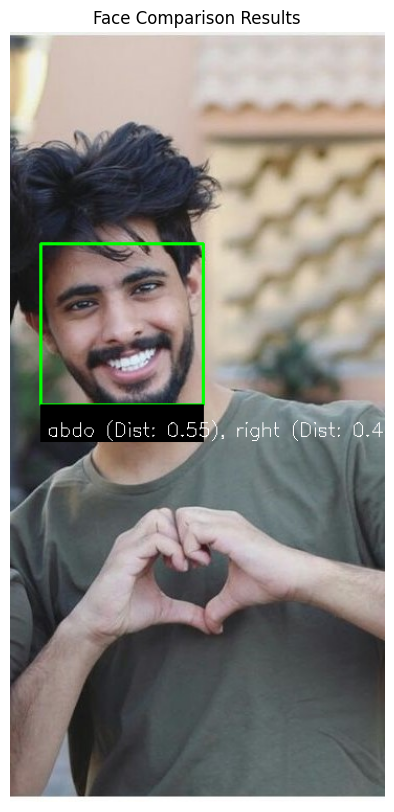

In [2]:
import face_recognition
import os
import numpy as np
import cv2

class FaceComparison:
    def __init__(self, known_faces_dir='images/known'):
        """
        Initialize the face comparison system
        
        :param known_faces_dir: Directory containing known face images
        """
        self.known_encodings = []
        self.known_names = []
        self.known_faces_dir = known_faces_dir
        self.load_known_faces()

    def load_known_faces(self):
        """
        Load known faces from the specified directory
        """
        try:
            # Get all image files from the known faces directory
            known_face_paths = [
                os.path.join(self.known_faces_dir, f) 
                for f in os.listdir(self.known_faces_dir) 
                if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))
            ]

            # Process each known face image
            for path in known_face_paths:
                try:
                    # Load image and get face encoding
                    image = face_recognition.load_image_file(path)
                    encodings = face_recognition.face_encodings(image)
                    
                    if encodings:
                        # Store encoding and name
                        self.known_encodings.append(encodings[0])
                        # Use filename (without extension) as name
                        name = os.path.splitext(os.path.basename(path))[0]
                        self.known_names.append(name)
                
                except Exception as e:
                    print(f"Error processing {path}: {e}")

            print(f"Loaded {len(self.known_names)} known faces")
        
        except Exception as e:
            print(f"Error loading known faces: {e}")

    def compare_faces(self, unknown_image_path, tolerance=0.6):
        """
        Compare an unknown face image with known faces
        
        :param unknown_image_path: Path to the unknown face image
        :param tolerance: How much distance between faces to consider it a match (lower is stricter)
        :return: List of matches with their names and distances
        """
        try:
            # Load the unknown image
            unknown_image = face_recognition.load_image_file(unknown_image_path)
            
            # Get face encodings for the unknown image
            unknown_encodings = face_recognition.face_encodings(unknown_image)
            
            if not unknown_encodings:
                print("No face found in the unknown image")
                return []
            
            # Results to store matches
            matches = []
            
            # Compare each face encoding in the unknown image
            for unknown_encoding in unknown_encodings:
                # Calculate face distances
                face_distances = face_recognition.face_distance(self.known_encodings, unknown_encoding)
                
                # Find matches within the tolerance
                for i, distance in enumerate(face_distances):
                    if distance <= tolerance:
                        matches.append({
                            'name': self.known_names[i],
                            'distance': distance
                        })
                
            return matches
        
        except Exception as e:
            print(f"Error comparing faces: {e}")
            return []

    def visualize_comparison(self, unknown_image_path):
        """
        Visualize face comparison results
        
        :param unknown_image_path: Path to the unknown face image
        """
        try:
            # Load the unknown image
            unknown_image = face_recognition.load_image_file(unknown_image_path)
            
            # Convert to OpenCV format
            unknown_image_cv2 = cv2.cvtColor(unknown_image, cv2.COLOR_RGB2BGR)
            
            # Get face locations
            face_locations = face_recognition.face_locations(unknown_image)
            
            # Perform comparison
            matches = self.compare_faces(unknown_image_path)
            
            # Visualize results
            for (top, right, bottom, left) in face_locations:
                # Draw rectangle around the face
                cv2.rectangle(unknown_image_cv2, (left, top), (right, bottom), (0, 255, 0), 2)
                
                # Prepare match text
                if matches:
                    match_text = ", ".join([f"{m['name']} (Dist: {m['distance']:.2f})" for m in matches])
                else:
                    match_text = "Unknown"
                
                # Draw match text
                cv2.rectangle(unknown_image_cv2, (left, bottom + 35), (right, bottom), (0, 0, 0), cv2.FILLED)
                cv2.putText(unknown_image_cv2, match_text, (left + 6, bottom + 30), 
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1)
            
            # Show the image
            plt.figure(figsize=(10, 10))
            plt.imshow(cv2.cvtColor(unknown_image_cv2, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            plt.title('Face Comparison Results')
            plt.show()
            
            return matches
        
        except Exception as e:
            print(f"Error visualizing comparison: {e}")
            return []

# Example usage
def main():
    # Create an instance of FaceComparison
    face_comp = FaceComparison()
    
    # Path to the unknown image you want to compare
    unknown_image_path = 'images/left.jpg'
    
    # Perform comparison
    matches = face_comp.compare_faces(unknown_image_path,tolerance=.5)   # tolerance=.5 is the threshold     
    # Print match results
    if matches:
        print("Matched Faces:")
        for match in matches:
            print(f"Name: {match['name']}, Distance: {match['distance']:.2f}")
    else:
        print("No matching faces found")
    
    # Visualize comparison
    face_comp.visualize_comparison(unknown_image_path)

if __name__ == "__main__":
    import matplotlib.pyplot as plt
    main()

In [ ]:
# More strict matching
# matches = face_comp.compare_faces(unknown_image_path, tolerance=0.5)

# # Balanced matching
# matches = face_comp.compare_faces(unknown_image_path, tolerance=0.6)

# # More lenient متساهل   matching
# matches = face_comp.compare_faces(unknown_image_path, tolerance=0.7)

## face recognation in video
there is a problem with detecting videos 

In [ ]:
# import face_recognition
# import cv2
# import numpy as np
# import os

# class FaceRecognition:
#     def __init__(self, known_faces_dir='images/known', output_video_path='outputs/output_2.avi'):
#         """
#         Initialize the face recognition system

#         :param known_faces_dir: Directory containing known face images
#         :param output_video_path: Path to save the output video
#         """
#         self.known_encodings = []
#         self.known_names = []
#         self.known_faces_dir = known_faces_dir
#         self.output_video_path = output_video_path
#         self.load_known_faces()

#     def load_known_faces(self):
#         """
#         Load known faces from the specified directory
#         """
#         try:
#             # Get all image files from the known faces directory
#             known_face_paths = [
#                 os.path.join(self.known_faces_dir, f) 
#                 for f in os.listdir(self.known_faces_dir) 
#                 if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp'))
#             ]

#             # Process each known face image
#             for path in known_face_paths:
#                 try:
#                     # Load image and get face encoding
#                     image = face_recognition.load_image_file(path)
#                     encoding = face_recognition.face_encodings(image)[0]

#                     # Store encoding and name
#                     self.known_encodings.append(encoding)
#                     # Use filename (without extension) as name
#                     name = os.path.splitext(os.path.basename(path))[0]
#                     self.known_names.append(name)

#                 except Exception as e:
#                     print(f"Error processing {path}: {e}")

#             print(f"Loaded {len(self.known_names)} known faces")

#         except Exception as e:
#             print(f"Error loading known faces: {e}")

#     def recognize_faces_in_video(self, video_path):
#         """
#         Perform face recognition on a video file

#         :param video_path: Path to the input video file
#         """
#         # Initialize video capture
#         video_capture = cv2.VideoCapture(video_path)

#         # Get video properties for saving output
#         frame_width = int(video_capture.get(cv2.CAP_PROP_FRAME_WIDTH))
#         frame_height = int(video_capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
#         fps = int(video_capture.get(cv2.CAP_PROP_FPS)) or 20  # Default to 20 if FPS is unavailable

#         # Initialize VideoWriter
#         fourcc = cv2.VideoWriter_fourcc(*'XVID')
#         out = cv2.VideoWriter(self.output_video_path, fourcc, fps, (frame_width, frame_height))

#         while True:
#             # Capture frame-by-frame
#             ret, frame = video_capture.read()

#             if not ret:
#                 print("End of video or failed to grab frame")
#                 break

#             # Convert the image from BGR color to RGB
#             rgb_frame = frame[:, :, ::-1]

#             # Find all face locations and face encodings in the current frame
#             face_locations = face_recognition.face_locations(rgb_frame)
#             face_encodings = face_recognition.face_encodings(rgb_frame, face_locations)

#             # Loop through each face found in the frame
#             for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
#                 # Compare faces
#                 matches = face_recognition.compare_faces(self.known_encodings, face_encoding)
#                 name = "Unknown"

#                 # If a match is found
#                 if True in matches:
#                     first_match_index = matches.index(True)
#                     name = self.known_names[first_match_index]

#                 # Draw rectangle around the face
#                 cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)

#                 # Draw name label
#                 cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 0), cv2.FILLED)
#                 font = cv2.FONT_HERSHEY_SIMPLEX
#                 cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

#             # Write the frame to the output video
#             out.write(frame)

#             # Display the resulting frame
#             cv2.imshow('Face Recognition', frame)

#             # Hit 'q' to quit
#             if cv2.waitKey(1) & 0xFF == ord('q'):
#                 break

#         # Release the capture and close windows
#         video_capture.release()
#         out.release()
#         cv2.destroyAllWindows()

#     def run(self, video_path):
#         """
#         Run the face recognition system

#         :param video_path: Path to the input video file
#         """
#         if not self.known_encodings:
#             print("No known faces loaded. Please check the known faces directory.")
#             return

#         self.recognize_faces_in_video(video_path)

# # Example usage
# def main():
#     try:
#         # Create an instance of FaceRecognition
#         face_rec = FaceRecognition(output_video_path='output.avi')

#         # Specify the video file path
#         video_path = 'videos/rm_players.mp4'

#         # Run the face recognition
#         face_rec.run(video_path)

#     except Exception as e:
#         print(f"An error occurred: {e}")

# if __name__ == "__main__":
#     main()


Loaded 7 known faces
